In [63]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

import sklearn 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, LabelEncoder

In [64]:
data = pd.read_csv('CleanedData.csv').drop('Unnamed: 0', axis=1)

In [67]:
data.head()

,WTeamID,LTeamID,Season,DayNum,W_fgr,L_fgr,W_ftr,L_ftr,W_fgr3,L_fgr3,...,W_stl_a,W_blk_a,W_pf_a,L_or_a,L_dr_a,L_ast_a,L_to_a,L_stl_a,L_blk_a,L_pf_a
0,1143,1293,2010,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1314,1198,2010,7,0.461538,0.500000,0.687500,0.666667,0.416667,0.380952,...,8.000000,1.0,14.000000,11.000000,20.000000,11.0,17.000000,7.0,3.000000,24.0
2,1326,1108,2010,7,0.469027,0.477477,0.776119,0.743590,0.413793,0.390244,...,6.500000,2.0,17.000000,11.000000,19.000000,10.0,18.500000,9.5,3.000000,26.5
3,1393,1107,2010,7,0.488095,0.470238,0.755556,0.709677,0.414634,0.368421,...,6.333333,3.0,15.666667,11.666667,19.333333,10.0,16.666667,9.0,3.333333,26.0
4,1143,1178,2010,9,0.506667,NaN,0.754717,NaN,0.392857,NaN,...,6.000000,3.5,15.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
w_data = data.drop('LTeamID', axis=1)
l_data = data.drop('WTeamID', axis=1)

w_data['Outcome'] = np.array(1)
l_data['Outcome'] = np.array(0)

In [69]:
cols = []
for c in w_data.columns:
    name = str(c)
    if name=='WTeamID':
        cols.append("TeamID")
    elif name.startswith("W_", 0, 2):
        r_name = re.sub("W_", "Team_", name)
        cols.append(r_name)
    elif name.startswith("L_", 0, 2):
        t_name = re.sub("L_", "Opp_", name)
        cols.append(t_name)
    else:
        cols.append(name)
    
w_data.columns = cols

In [70]:
cols2 = []

for c in l_data.columns:
    name = str(c)
    if name=='LTeamID':
        cols2.append("TeamID")
    elif name.startswith("L_", 0, 2):
        r_name = re.sub("L_", "Team_", name)
        cols2.append(r_name)
    elif name.startswith("W_", 0, 2):
        t_name = re.sub("W_", "Opp_", name)
        cols2.append(t_name)
    else:
        cols2.append(name)
        
l_data.columns = cols2

In [71]:
team_data = w_data.merge(l_data, how='outer')

In [72]:
team_data.to_csv('teams_data.csv')
team_data.head()

,TeamID,Season,DayNum,Team_fgr,Opp_fgr,Team_ftr,Opp_ftr,Team_fgr3,Opp_fgr3,Team_or_a,...,Team_blk_a,Team_pf_a,Opp_or_a,Opp_dr_a,Opp_ast_a,Opp_to_a,Opp_stl_a,Opp_blk_a,Opp_pf_a,Outcome
0,1143,2010,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1314,2010,7,0.461538,0.500000,0.687500,0.666667,0.416667,0.380952,13.000000,...,1.0,14.000000,11.000000,20.000000,11.0,17.000000,7.0,3.000000,24.0,1
2,1326,2010,7,0.469027,0.477477,0.776119,0.743590,0.413793,0.390244,14.000000,...,2.0,17.000000,11.000000,19.000000,10.0,18.500000,9.5,3.000000,26.5,1
3,1393,2010,7,0.488095,0.470238,0.755556,0.709677,0.414634,0.368421,12.333333,...,3.0,15.666667,11.666667,19.333333,10.0,16.666667,9.0,3.333333,26.0,1
4,1143,2010,9,0.506667,NaN,0.754717,NaN,0.392857,NaN,11.750000,...,3.5,15.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [73]:
team_data.columns

Index(['TeamID', 'Season', 'DayNum', 'Team_fgr', 'Opp_fgr', 'Team_ftr',
       'Opp_ftr', 'Team_fgr3', 'Opp_fgr3', 'Team_or_a', 'Team_dr_a',
       'Team_ast_a', 'Team_to_a', 'Team_stl_a', 'Team_blk_a', 'Team_pf_a',
       'Opp_or_a', 'Opp_dr_a', 'Opp_ast_a', 'Opp_to_a', 'Opp_stl_a',
       'Opp_blk_a', 'Opp_pf_a', 'Outcome'],
      dtype='object')

In [86]:
w_fgr = team_data[team_data.Outcome==1].Team_fgr
l_fgr = team_data[team_data.Outcome==0].Team_fgr

w_pf = team_data[team_data.Outcome==1].Team_pf_a
l_pf = team_data[team_data.Outcome==0].Team_pf_a

w_assists = team_data[team_data.Outcome==1].Team_ast_a
l_assists = team_data[team_data.Outcome==0].Team_ast_a

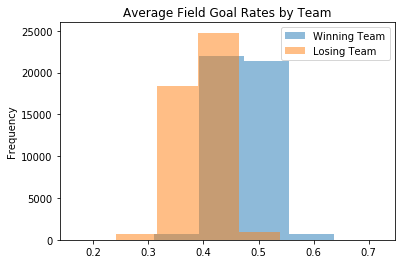

In [82]:
w_fgr.plot(kind='hist', bins=6, alpha=0.5, label='Winning Team')
l_fgr.plot(kind='hist', bins=6, alpha=0.5, label='Losing Team')
plt.title('Average Field Goal Rates by Team')
plt.legend()
plt.show()

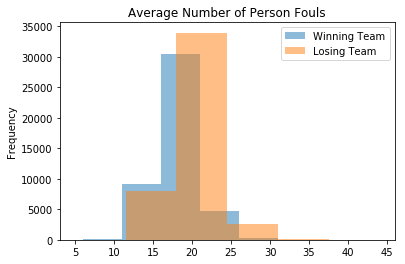

In [85]:
w_pf.plot(kind='hist', bins=6, alpha=0.5, label='Winning Team')
l_pf.plot(kind='hist', bins=6, alpha=0.5, label='Losing Team')
plt.title('Average Number of Person Fouls')
plt.legend()
plt.show()

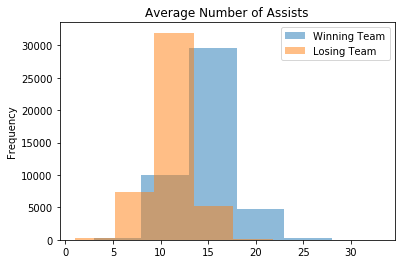

In [90]:
w_assists.plot(kind='hist', bins=6, alpha=0.5, label='Winning Team')
l_assists.plot(kind='hist', bins=6, alpha=0.5, label='Losing Team')
plt.title('Average Number of Assists')
plt.legend()
plt.show()